# Predicting heart diseasde using machine learniong

this notebook looks into using various python based machine learning and data science libraries in an attempt to build machine learning model capable of predicting if someone has heart disease or not.

We'rer going to take following approaches:
1. problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. problem definition

we have clinical parameters and we need to predict if patient has heart disease or not.

## 3. evaluation

if we can reach 95% accuracy oif predicting whether or not a patient has heart disease during the proof of concept,then we might pursue our project

## 4. Features

this is where you will get different information about each features in your data.



## 2. create a data dictionary
age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## preparing the tools
we're going to use pandas, numpy and matplotlib for data manipulation and data analysis.


In [1]:
#import tools we need
# regular eda and plotting libraries(EXploratory data analysis)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#(coz we waant our figures inside notebook) 
%matplotlib inline 

#import scikit learn tools and models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score, recall_score , f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# load our data
df = pd.read_csv("heart-disease.csv")
df.shape # rows and columns

(303, 14)

# Data EXploration
 here we will try to become the subject matter expert
    
    1. what uqestions are we trying to solve?
    2. what kind of data do we have and how do we treat different types?
    3. whats missing from data and how do we deal with it?
    4. where are the outliers and why you should we care about them?
    5. how can you add, change or remove features to get more from your data?
    

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

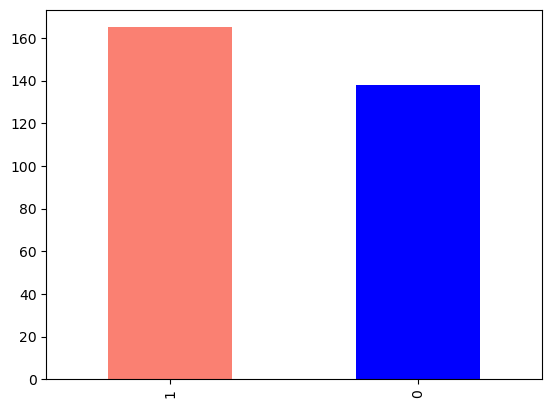

In [5]:
df["target"].value_counts().plot(kind = "bar", color = ["salmon" , "blue"]);

In [6]:
# are ther any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
### Heart disease Frequency according to Sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
#compare target columnn
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


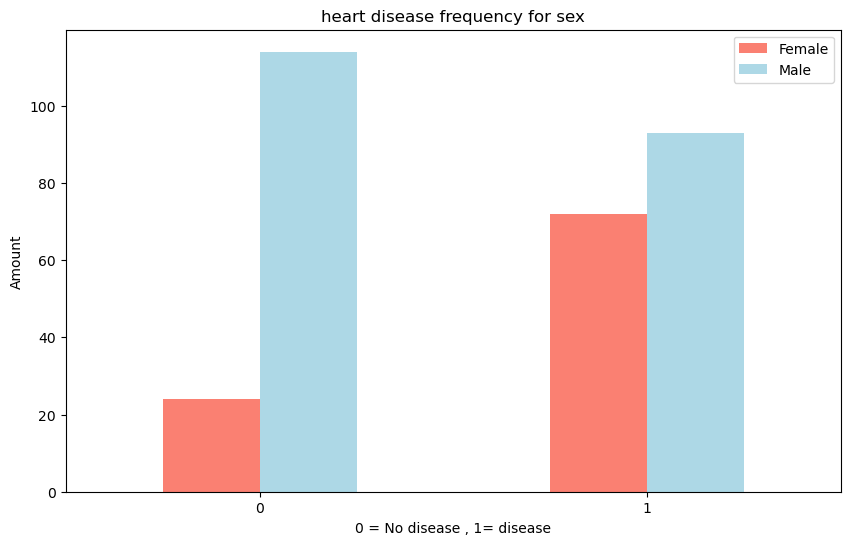

In [11]:
pd.crosstab(df.target,df.sex).plot(kind = "bar", figsize = (10,6),color = ["salmon", "lightblue"]);
plt.title("heart disease frequency for sex")
plt.xlabel("0 = No disease , 1= disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation = 0);

In [12]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

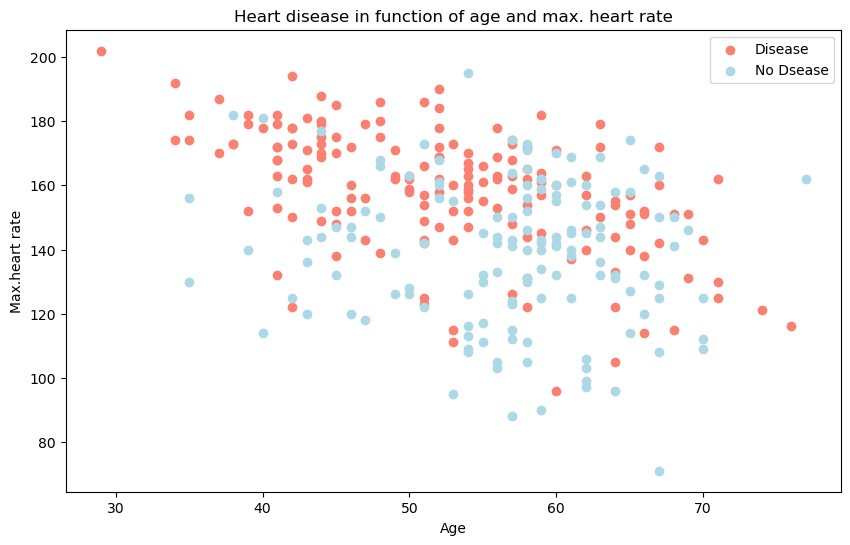

In [13]:
# avg. vs max. heart rate for heart disease
plt.figure(figsize = (10,6))

#Scatter with positive examples(who have heart disease)
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c= "salmon")

#Scatter with negative examples(who do not have heart disease)
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c= "lightblue");

#add some help for info
plt.title("Heart disease in function of age and max. heart rate")
plt.xlabel("Age")
plt.ylabel("Max.heart rate")
plt.legend(["Disease", "No Dsease"]);



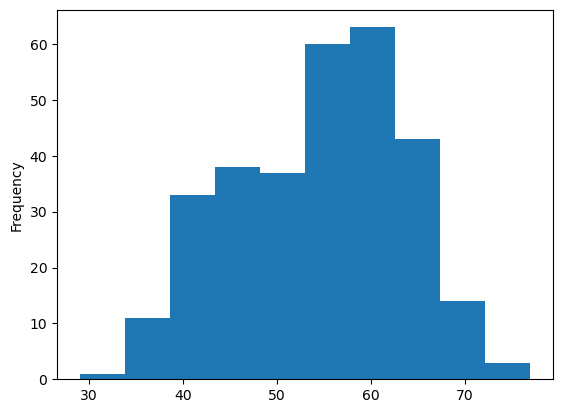

In [14]:
df.age.plot.hist();


#### Heart Disease Frequency per chest pain type


In [15]:
pd.crosstab(df.cp ,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


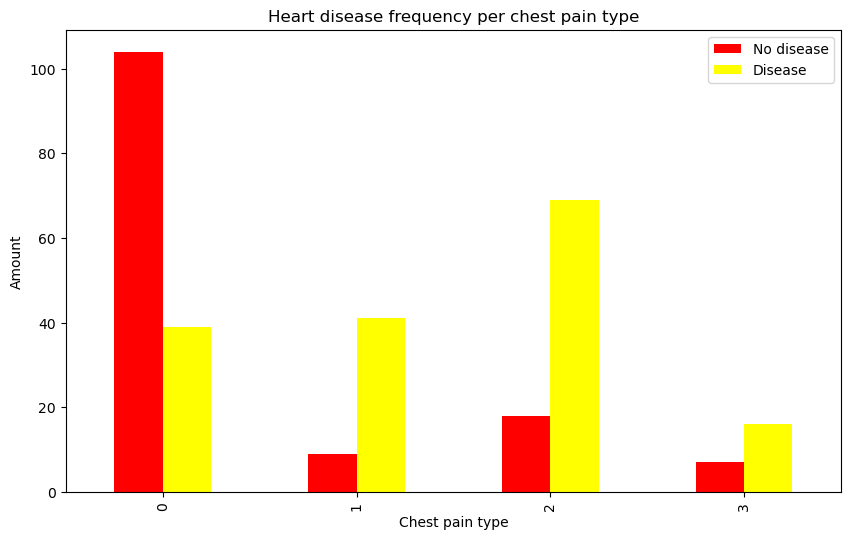

In [16]:
#lets make this visual
pd.crosstab(df.cp ,df.target).plot(kind = "bar",figsize = (10,6),color = ["red","yellow"])

#add some communication
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"]);

In [17]:
#make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


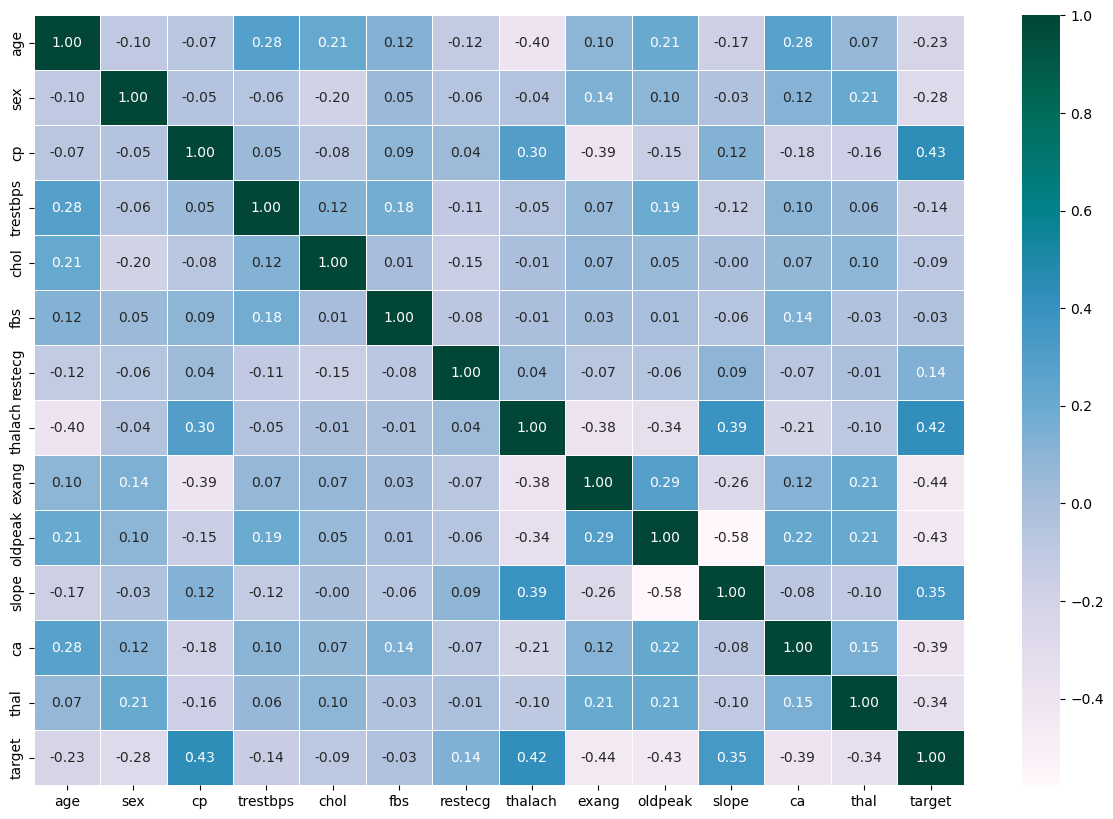

In [18]:
#lets make our correlation matrix a little prettier
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap = "PuBuGn");

# Higher positive value means a potential positive Correlation(increase)
                           ## AND
# Lower negative value means a potential negative Correlation(dcrease)        

## 5. Modelling

In [19]:
#split data into X and y
X = df.drop("target",axis = 1)
y = df["target"]

In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
# Split data into train and test data
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [22]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


Now we've got our data into training and test data

we will train it on training set and then test it on our test data.

we will try 3 different models:
1. Logistic Regression
2. K-nearest Neighbors Classifier
3. Random Forest Classifier

In [23]:
# ** the main objective of this is to make a function which will run all models at once instead of doing it one by one ** 


#put models into dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

#create a function to fit and score models
def fit_and_score(models, X_train,X_test,y_train,y_test):
    """
    Fits and evaluate machine learning model.
    models : a dict of different Scikit learn machine learning models
    X_train :training data(no labels)
    X_test: testing data(no labels)
    Y_train : training labels
    y_test : test labels
    """
    np.random.seed(42)
    
    #make a dict. to keep model scores
    model_scores = {}
    #loop through models
    for name , model in models.items():
        # fit the model to the data
        model.fit(X_train,y_train)
        #evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores
        

In [24]:
model_scores = fit_and_score(models = models ,
                            X_train = X_train,X_test = X_test,y_train = y_train,y_test = y_test)
model_scores

C:\Users\HP\Desktop\data_science\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

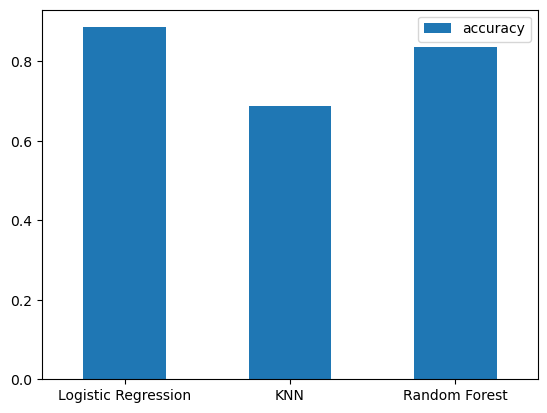

In [25]:
# model comparison
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();
plt.xticks(rotation = 0);

#Now we wil TUNE OUR HYPER PARAMETERS(i.e we will improve our model)
we will look at the folloeing
* Hyper parameter tuning
* feature importance
* confusion matrix
* cross validation
* precison
* recall
* f1 score
* Classification report
* ROC curve
* area under the curve

In [26]:
#lets tune knn by hand

train_scores = []
test_scores = []

#Create a range of values for  n_neighbors
neighbors = range(1,21)


#Create a list of different value for n_neighbors
knn  = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(X_train,y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #Update the testing scores list
    test_scores.append(knn.score(X_test,y_test))
    
    

In [27]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
 test_scores
    

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN scores on the test data : 75.41%


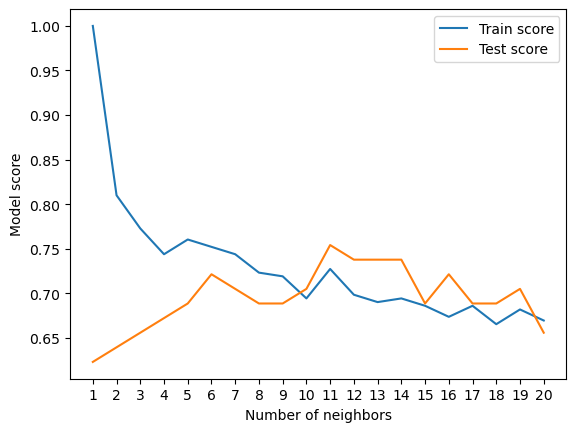

In [29]:
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.xticks(np.arange(1,21,1))

print(f"Maximum KNN scores on the test data : {max(test_scores)*100:.2f}%")

## hyper parameter tunin with randomized search cv
## for finding models use google

we are going to tune
* Logistic regression
* RAndomForestClassifier
using RandomizedSearchCV



In [30]:
# CReate a hyperparameter for logistic regression
log_reg_grid = {"C" : np.logspace(-4,4,20),
               "solver" : ["liblinear"]}

#create a hyperparameter for random forest classifier
rf_grid = {"n_estimators" :np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [31]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [32]:
np.arange(10,1000,50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])

In [33]:
## Now we have got our hyperparameters ready its time to tune them with randomized searchcv

In [34]:
# Tune logistics regresssion
np.random.seed(42)

#setup random hyper parameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions  = log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

#fit random  hyper parameter search for logistic regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [37]:
np.random.seed(42)

#setup random hyper parameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions  = rf_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

#fit random  hyper parameter search for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [39]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [40]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## hyperparameter tuning with Grid search CV

Since our Logistic Regression model provides the best scores so far we will try to improve it by grid search CV

In [41]:
# Different hyperparameters for our Logistic Regeression
lo_reg_grid = {"C": np.logspace(-4,4,30),
              "solver": ["liblinear"]}

#setup grid hyper parameter search for RandomForestClassifier
gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid = log_reg_grid,
                               cv = 5,
                               verbose = True)

#fit GRid hyper parameter search for logistic regression
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [43]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned ML classifier beyond accuracy

* ROC and AUC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

also it would be great if cross validation was used

to make comparison and evaluation we need to  make predictions

In [44]:
# making predictions
y_preds = gs_log_reg.predict(X_test)

In [45]:
y_preds


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

C:\Users\HP\Desktop\data_science\heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


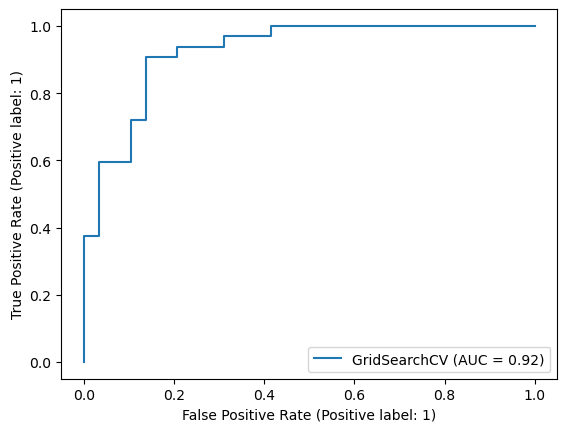

In [46]:
# plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test,y_test);

In [47]:
#Confusion matrix
print (confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


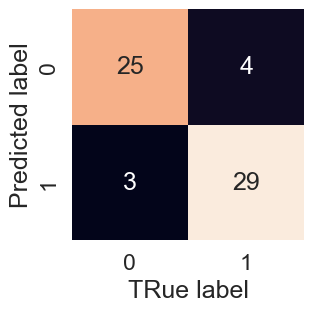

In [48]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test,y_preds):
    """
    PLots a nice looking confusion matrix using seaborns heat map
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("TRue label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds)    

In [49]:
#NOW lets do classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## CAlculate evaluation metrics using cross validation method

using cross_val_score

In [50]:
#chesk best hyperparameter
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [51]:
# create a new classifier with best parameters
clf = LogisticRegression(C=0.23357214690901212, solver = "liblinear")

In [52]:
#Cross validated accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [53]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [54]:
#Cross validated precision
cv_prec = cross_val_score(clf,X,y,cv=5,scoring = "precision")
cv_prec = np.mean(cv_prec)
cv_prec

0.8215873015873015

In [55]:
#Cross validated recall
cv_rec = cross_val_score(clf,X,y,cv=5,scoring = "recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.9272727272727274

In [68]:
#Cross validated f1 score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

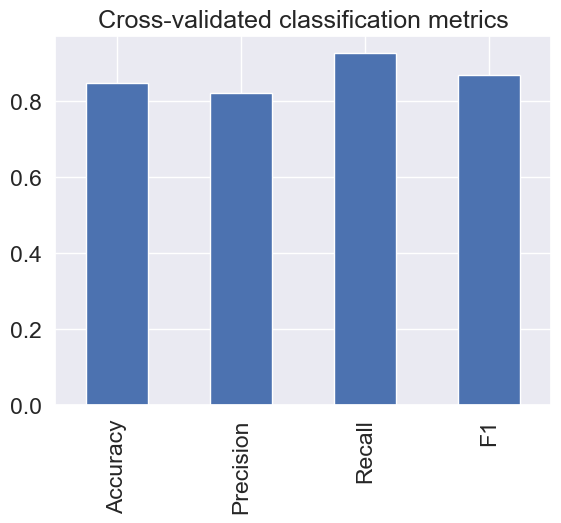

In [71]:
# visualize our cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_prec,
                          "Recall":cv_rec,
                          "F1":cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend = False)

## FEATURE Importance

IT tells us about which feature contributed most to the outcomes and how they contribute.

In [73]:
# FIT AN INSTANCE OF LOGI. REGR.
clf = LogisticRegression(C=0.23357214690901212, solver = "liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [74]:
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [75]:
#match the feature to the column
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

<AxesSubplot:title={'center':'Feature importance'}>

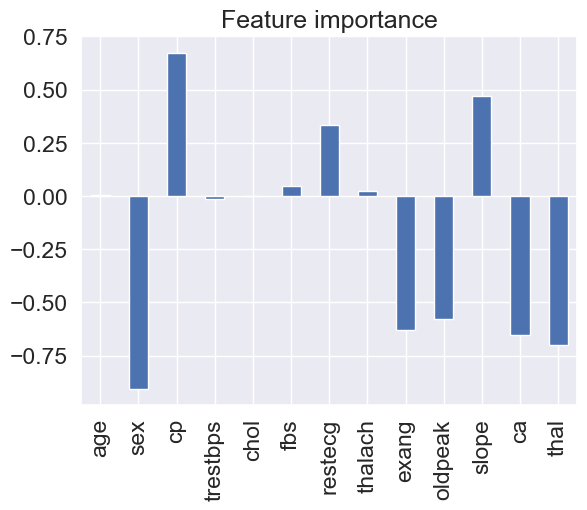

In [76]:
#Visualize Feature Importance 
feature_df = pd.DataFrame(feature_dict ,index=[0])
feature_df.T.plot.bar(title = "Feature importance" ,legend = False)

In [77]:
#lets check feature importance of sex
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93
